In [1]:
using Random, Distributions
using Plots

In [2]:
using Revise

In [3]:
using ScientificRT

┌ Info: Precompiling ScientificRT [5bc58e1e-5d7c-492b-bf1e-f34da4464f5b]
└ @ Base loading.jl:1260


# Set random seed
ℹ️ I'm setting the random seed to a fixed value for now, in order for results to be reproducible

# Test drawing from distributions in `Distributions.jl`

## Test drawing from uniform distribution

In [4]:
uniform_dist = Uniform(0,1)

Uniform{Float64}(a=0.0, b=1.0)

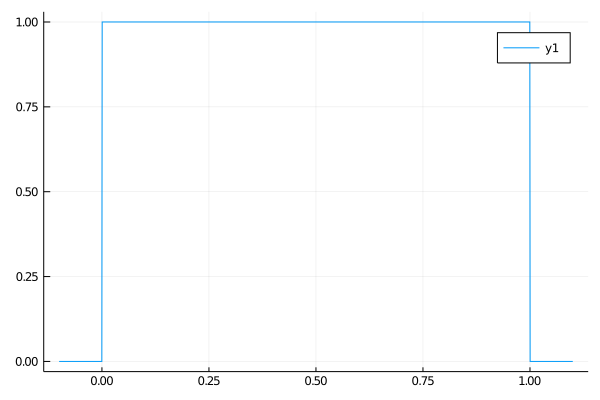

In [5]:
plot(λ -> pdf(uniform_dist, λ), xlims=[-0.1,1.1])

In [6]:
sample_count = 10000
rand_numbers_array = rand(uniform_dist,sample_count);

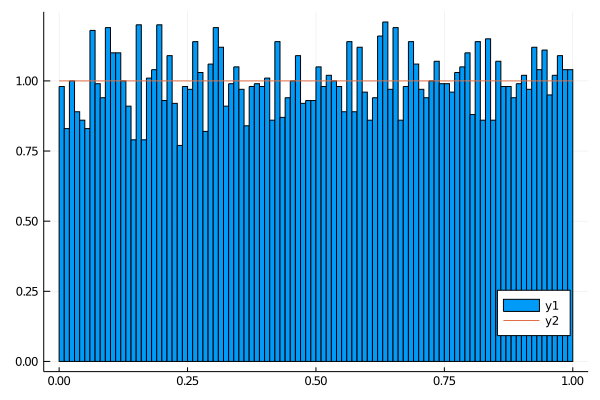

In [7]:
histogram(rand_numbers_array, normed=true, bins=100)
plot!(λ -> pdf(uniform_dist, λ), xlims=[0,1], legend=:bottomright)

## Test drawing from exponential distribution

In [8]:
b = 1.0 # scale of the exponential distribution
exp_dist = Exponential(b)

Exponential{Float64}(θ=1.0)

In [9]:
rate(exp_dist)

1.0

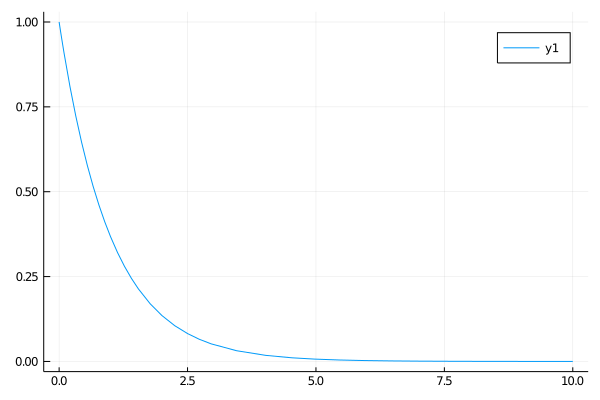

In [10]:
plot(λ -> pdf(exp_dist, λ), xlims=[0,10])

In [11]:
sample_count = 10000

10000

In [12]:
rand_numbers_array = rand(exp_dist,sample_count);

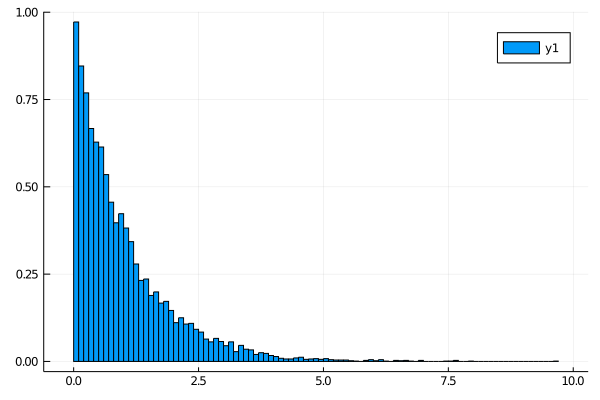

In [13]:
histogram(rand_numbers_array, normed=true)

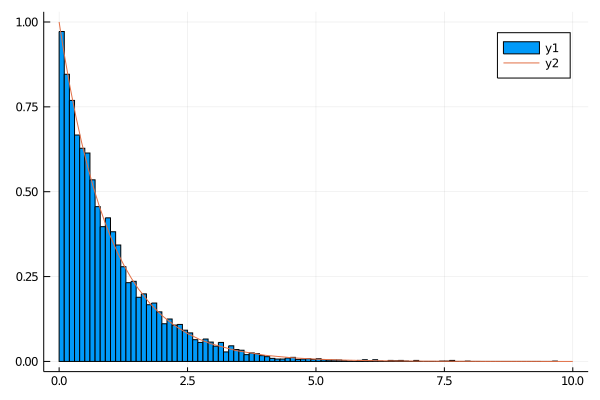

In [14]:
plot!(λ -> pdf(exp_dist, λ), xlims=[0,10])

# Test sample distributions

## Test constant $\sigma_t$ (i.e. homogeneous medium)

In [15]:
σ_t_max = 1.
const_σ = 0.9*σ_t_max
σ_t = λ -> const_σ
tmax = 5.;

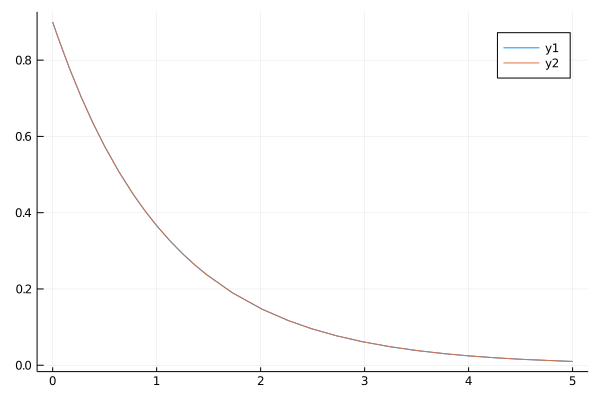

In [16]:
exp_dist = Exponential(1/const_σ)
ground_truth_pdf = λ -> pdf(exp_dist, λ)
plot(ground_truth_pdf, xlims=[0,tmax])
plot!(λ -> const_σ*exp(-const_σ*λ), xlims=[0,tmax]) # sanity check

In [17]:
scale(exp_dist)    

1.1111111111111112

In [18]:
λ_sampler = WoodcockTracker(σ_t, σ_t_max)

WoodcockTracker{Float64,var"#11#12"}(Uniform{Float64}(a=0.0, b=1.0), Exponential{Float64}(θ=1.0), var"#11#12"(), 1.0)

In [19]:
t_start = 0.0
λ_sampler(t_start, tmax)

0.13208352775652668

In [20]:
num_samples = 100000
rand_samples_constant_σ = [λ_sampler(t_start, tmax) for i in 1:num_samples];
rand_samples_constant_σ_trimmed = [x for x in rand_samples_constant_σ if x <= tmax];

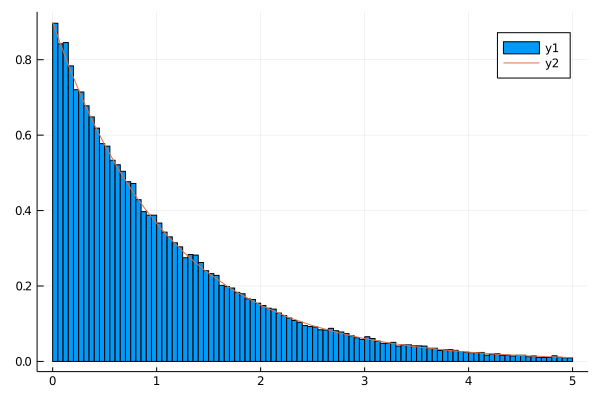

In [21]:
histogram(rand_samples_constant_σ_trimmed, normed=true)
plot!(ground_truth_pdf, xlims=[0,tmax])

#### Test transmittance estimation

In [22]:
Tr_ground_truth = λ -> exp(-const_σ*λ)

#21 (generic function with 1 method)

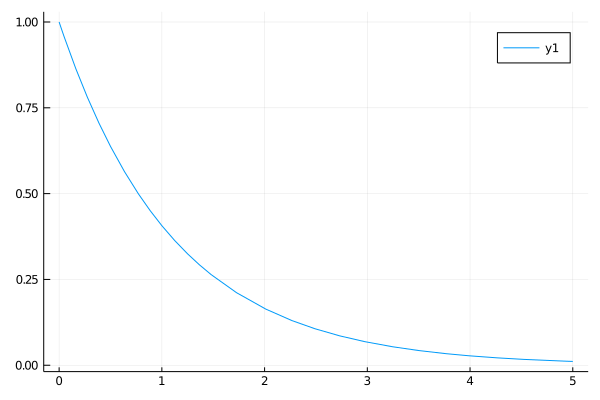

In [23]:
plot(Tr_ground_truth, xlims=[0,tmax])

In [24]:
Tr_ground_truth(1.0)

0.4065696597405991

In [25]:
est_transmittance(λ_sampler, t_start, 1.0, 10000) # result is the sample mean of a sampled RV

0.4134

*Transmittance result with 1000 samples*:

In [26]:
est_trans = x -> est_transmittance(λ_sampler, t_start, x, 1000);

In [27]:
x_range = 0:0.1:tmax
approx_transmittances = est_trans.(x_range);

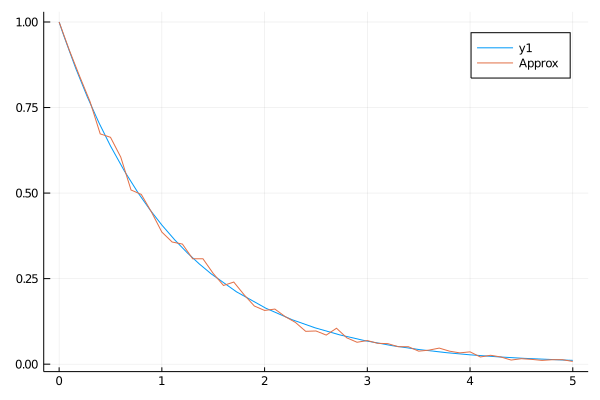

In [28]:
plot(Tr_ground_truth, xlims=[0,tmax])
plot!(x_range, approx_transmittances, label="Approx")

*Transmittance result with 10,000 samples:*

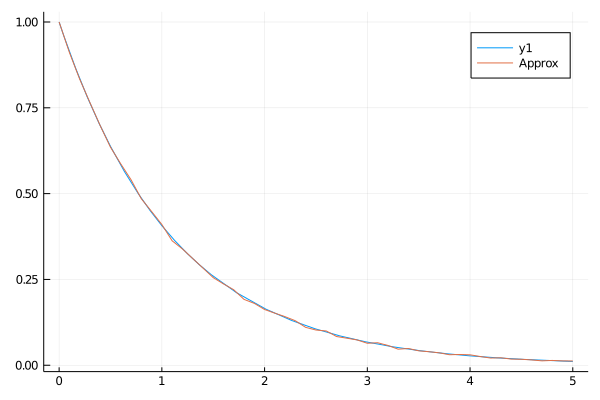

In [29]:
x_range = 0:0.1:tmax
est_trans = x -> est_transmittance(λ_sampler, t_start, x, 10000);
approx_transmittances = est_trans.(x_range);

plot(Tr_ground_truth, xlims=[0,tmax])
plot!(x_range, approx_transmittances, label="Approx")

### Test again but with different constant $\sigma_t$

In [30]:
σ_t_max = 3.
const_σ = 0.9*σ_t_max
σ_t = λ -> const_σ
tmax = 2.;

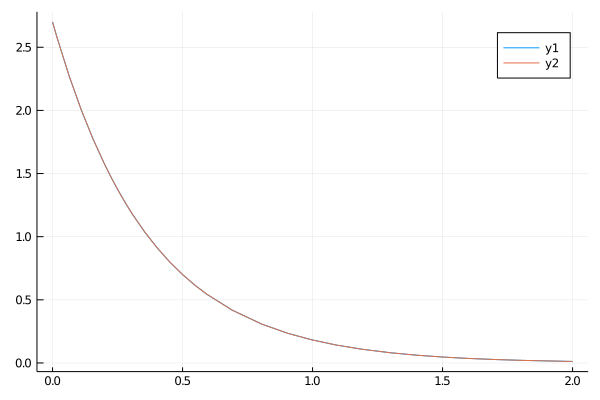

In [31]:
exp_dist = Exponential(1/const_σ)
ground_truth_pdf = λ -> pdf(exp_dist, λ)
plot(ground_truth_pdf, xlims=[0,tmax])
plot!(λ -> const_σ*exp(-const_σ*λ), xlims=[0,tmax]) # sanity check

In [32]:
scale(exp_dist)    

0.37037037037037035

In [33]:
λ_sampler = WoodcockTracker(σ_t, σ_t_max)

WoodcockTracker{Float64,var"#27#28"}(Uniform{Float64}(a=0.0, b=1.0), Exponential{Float64}(θ=0.3333333333333333), var"#27#28"(), 3.0)

In [34]:
tmin = 0.0
λ_sampler(tmin,tmax)

0.24290858842357893

In [35]:
num_samples = 100000
rand_samples_constant_σ = [λ_sampler(tmin,tmax) for i in 1:num_samples];
rand_samples_constant_σ_trimmed = [x for x in rand_samples_constant_σ if x <= tmax];

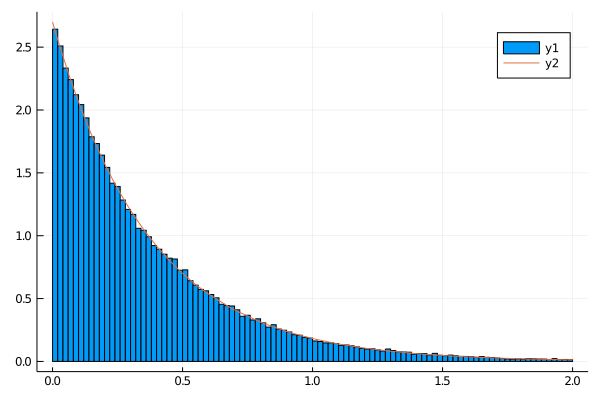

In [36]:
histogram(rand_samples_constant_σ_trimmed, normed=true)
plot!(ground_truth_pdf, xlims=[0,tmax])

#### Test transmittance estimation

In [37]:
Tr_ground_truth = λ -> exp(-const_σ*λ)

#37 (generic function with 1 method)

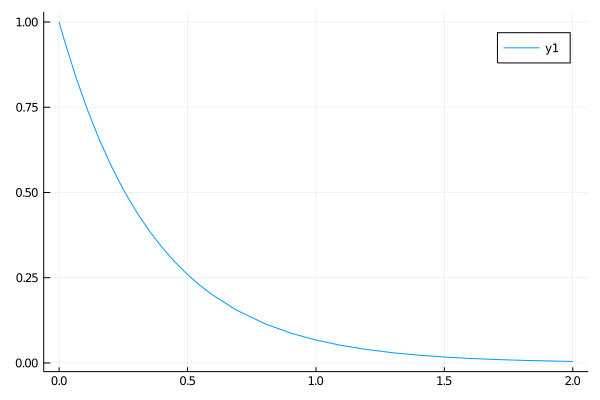

In [38]:
plot(Tr_ground_truth, xlims=[0,tmax])

In [39]:
Tr_ground_truth(1.0)

0.06720551273974976

In [40]:
est_transmittance(λ_sampler, tmin, 1.0, 10000)

0.0676

*Transmittance result with 1000 samples*:

In [41]:
est_trans = x -> est_transmittance(λ_sampler, t_start, x, 1000);
x_range = 0:0.1:tmax
approx_transmittances = est_trans.(x_range);

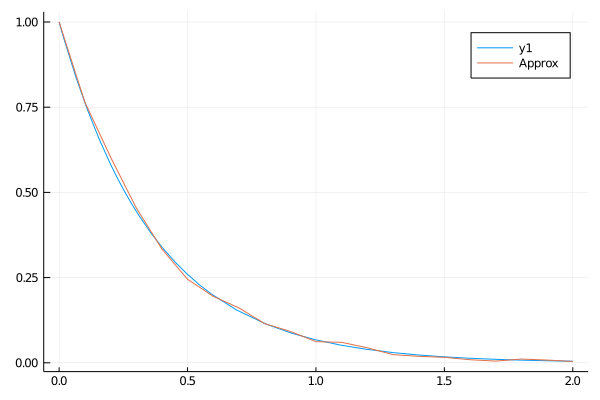

In [42]:
plot(Tr_ground_truth, xlims=[0,tmax])
plot!(x_range, approx_transmittances, label="Approx")

*Transmittance result with 10,000 samples:*

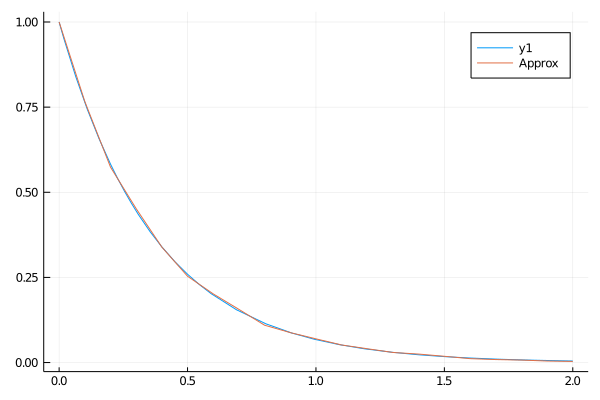

In [43]:
x_range = 0:0.1:tmax
est_trans = x -> est_transmittance(λ_sampler, t_start, x, 10000);
approx_transmittances = est_trans.(x_range);

plot(Tr_ground_truth, xlims=[0,tmax])
plot!(x_range, approx_transmittances, label="Approx")

## Test with $\sigma_t(t) = t^2$ 

In [44]:
σ_t_max = 9.
σ_t = λ -> λ^2
tmax = 3.;

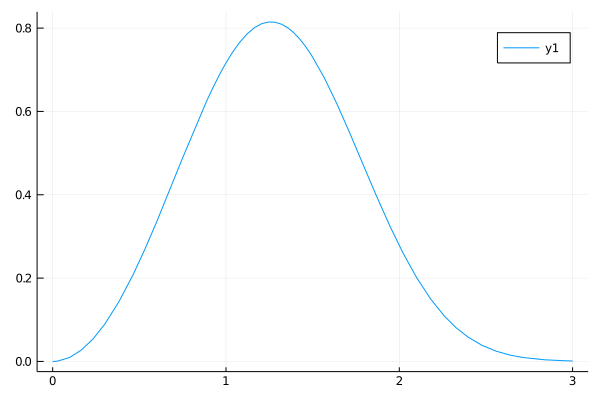

In [45]:
ground_truth_pdf = λ -> λ^2*exp(-λ^3/3)
plot(ground_truth_pdf, xlims=[0,tmax])

In [46]:
λ_sampler = WoodcockTracker(σ_t, σ_t_max)

WoodcockTracker{Float64,var"#43#44"}(Uniform{Float64}(a=0.0, b=1.0), Exponential{Float64}(θ=0.1111111111111111), var"#43#44"(), 9.0)

In [47]:
tmin = 0.0
num_samples = 100000
rand_samples_constant_σ = [λ_sampler(tmin, tmax) for i in 1:num_samples];
rand_samples_constant_σ_trimmed = [x for x in rand_samples_constant_σ if x <= tmax];

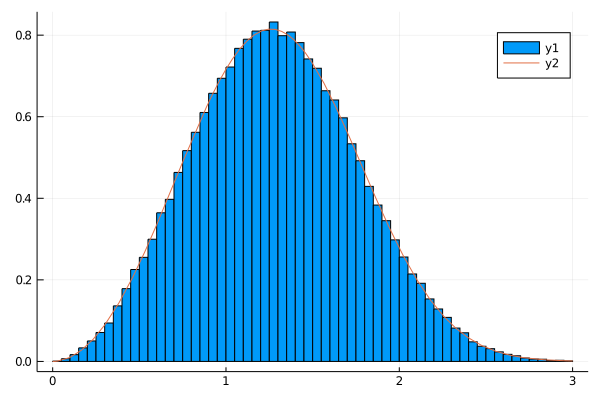

In [48]:
histogram(rand_samples_constant_σ_trimmed, normed=true)
plot!(ground_truth_pdf, xlims=[0,tmax])

#### Test transmittance estimation

In [49]:
Tr_ground_truth = λ -> exp(-λ^3/3)

#51 (generic function with 1 method)

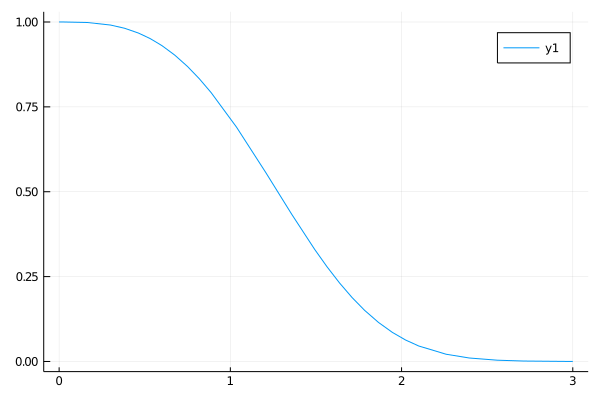

In [50]:
plot(Tr_ground_truth, xlims=[0,tmax])

In [51]:
Tr_ground_truth(1.0)

0.7165313105737893

In [52]:
est_transmittance(λ_sampler, tmin, 1.0, 10000)

0.7174

*Transmittance result with 1000 samples*:

In [53]:
est_trans = x -> est_transmittance(λ_sampler, t_start, x, 1000);
x_range = 0:0.1:tmax
approx_transmittances = est_trans.(x_range);

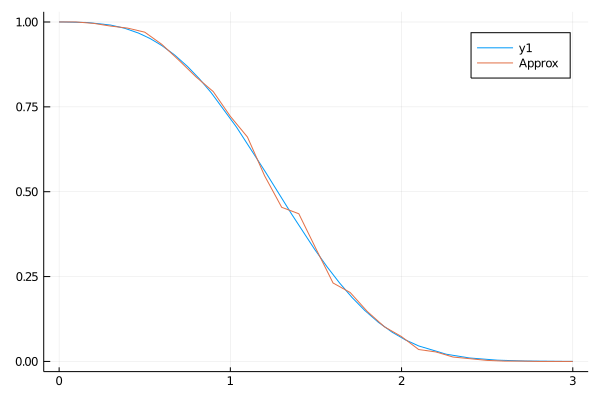

In [54]:
plot(Tr_ground_truth, xlims=[0,tmax])
plot!(x_range, approx_transmittances, label="Approx")

*Transmittance result with 10,000 samples:*

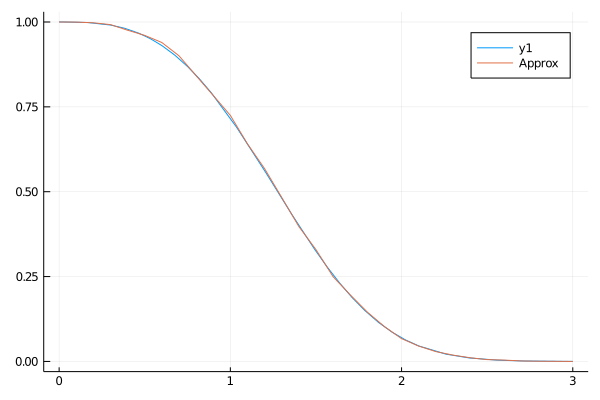

In [55]:
x_range = 0:0.1:tmax
est_trans = x -> est_transmittance(λ_sampler, t_start, x, 10000);
approx_transmittances = est_trans.(x_range);

plot(Tr_ground_truth, xlims=[0,tmax])
plot!(x_range, approx_transmittances, label="Approx")

## Test with $\sigma_t(t) = \cos^2(2\pi{t})$ 

In [56]:
σ_t_max = 1.
σ_t = λ -> cos(2*π*λ)^2
tmax = 2*π;

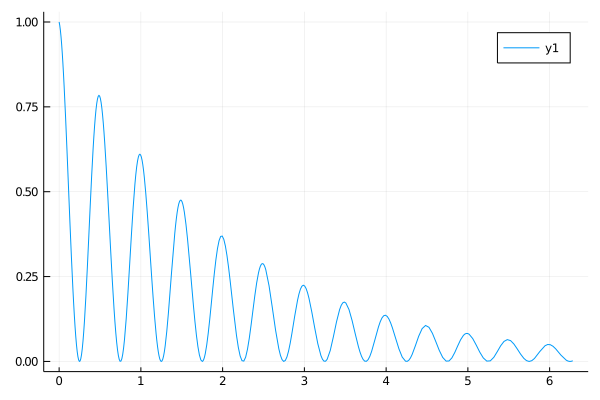

In [57]:
ground_truth_pdf = λ -> cos(2*pi*λ)^2*exp(-(4*π*λ + sin(4*π*λ))/(8*π))
plot(ground_truth_pdf, xlims=[0,tmax])

In [58]:
λ_sampler = WoodcockTracker(σ_t, σ_t_max)

WoodcockTracker{Float64,var"#57#58"}(Uniform{Float64}(a=0.0, b=1.0), Exponential{Float64}(θ=1.0), var"#57#58"(), 1.0)

In [59]:
tmin = 0.0
rand_samples_constant_σ = [λ_sampler(tmin, tmax) for i in 1:num_samples];
rand_samples_constant_σ_trimmed = [x for x in rand_samples_constant_σ if x <= tmax];

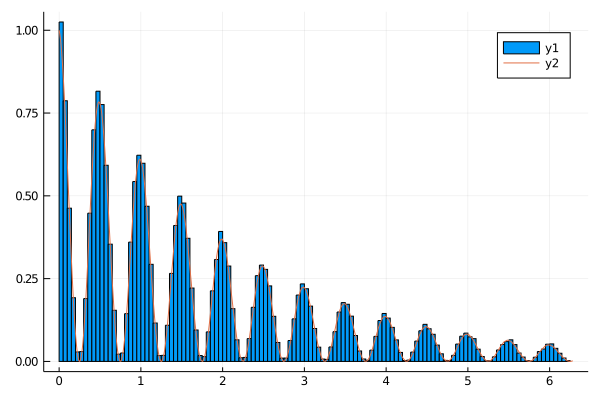

In [60]:
histogram(rand_samples_constant_σ_trimmed, normed=true, bins=200)
plot!(ground_truth_pdf, xlims=[0,tmax])

#### Test transmittance estimation

In [61]:
Tr_ground_truth = λ -> exp(-(4*π*λ + sin(4*π*λ))/(8*π))

#65 (generic function with 1 method)

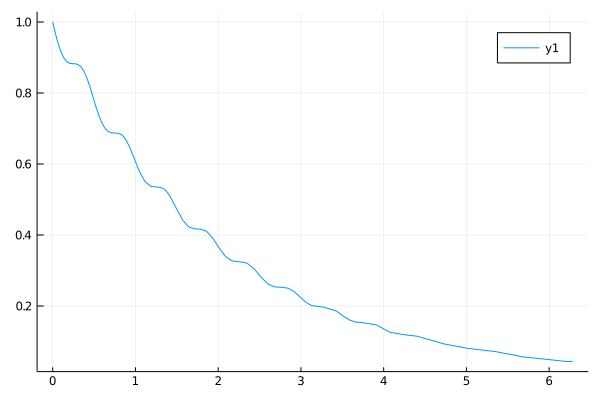

In [62]:
plot(Tr_ground_truth, xlims=[0,tmax])

In [63]:
Tr_ground_truth(1.0)

0.6065306597126334

In [64]:
est_transmittance(λ_sampler, tmin, 1.0, 1000)

0.604

*Transmittance result with 1000 samples*:

In [65]:
est_trans = x -> est_transmittance(λ_sampler, t_start, x, 1000);
x_range = 0:0.1:tmax
approx_transmittances = est_trans.(x_range);

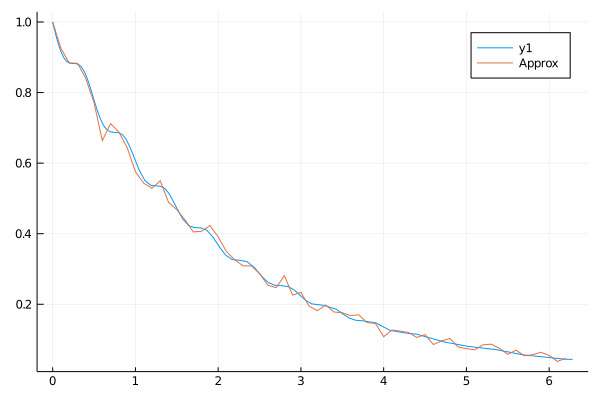

In [66]:
plot(Tr_ground_truth, xlims=[0,tmax])
plot!(x_range, approx_transmittances, label="Approx")

*Transmittance result with 10,000 samples:*

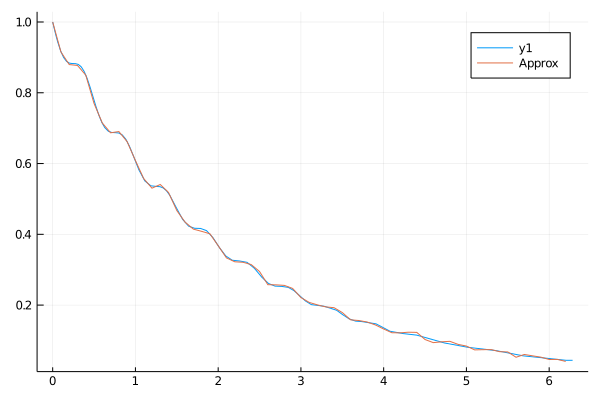

In [67]:
x_range = 0:0.1:tmax
est_trans = x -> est_transmittance(λ_sampler, t_start, x, 10000);
approx_transmittances = est_trans.(x_range);

plot(Tr_ground_truth, xlims=[0,tmax])
plot!(x_range, approx_transmittances, label="Approx")